# Unsupervised Learning

In [83]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [8]:
df = pd.read_csv('USArrests.csv', index_col=0)

In [9]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


## 1) K-Means

In [10]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


**MinMaxScaler**

In [22]:
sc = MinMaxScaler((0, 1))

In [24]:
df = sc.fit_transform(df)

In [25]:
df

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

**Model**

In [29]:
k_means = KMeans(n_clusters=4, random_state=17).fit(X=df)

In [30]:
k_means.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 10,
 'random_state': 17,
 'tol': 0.0001,
 'verbose': 0}

In [31]:
k_means.n_clusters

4

In [32]:
k_means.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])

In [35]:
k_means.labels_

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 2, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

In [37]:
k_means.inertia_

3.6834561535859134

**Optimum Clustering Alternatif 1**

In [ ]:
k_means = KMeans(n_clusters=4, random_state=17).fit(X=df)
k_means.n_clusters
k_means.inertia_

In [78]:
sse = []
clusters = range(2, 30)

for cluster in clusters:
    k_means = KMeans(n_clusters=cluster, random_state=17).fit(X=df)
    sse.append(k_means.inertia_)

In [79]:
sse

[6.596893867946196,
 5.010878493006417,
 3.6834561535859134,
 3.1999182085623374,
 2.842666186622827,
 2.631725837655405,
 2.3251087700415183,
 2.0686398098410184,
 1.8327104332088635,
 1.661699408412769,
 1.518394185479906,
 1.3770549513112536,
 1.3148895920096257,
 1.271133650711445,
 1.1578833875407082,
 1.0341984464834657,
 0.9299671485436678,
 0.9208925548828129,
 0.8350853328360585,
 0.7684114698258376,
 0.7496106928018123,
 0.7073985700412032,
 0.6207315225217471,
 0.5611378107893317,
 0.5108547103002282,
 0.4655309280781473,
 0.4430857838274421,
 0.40647513810881875]

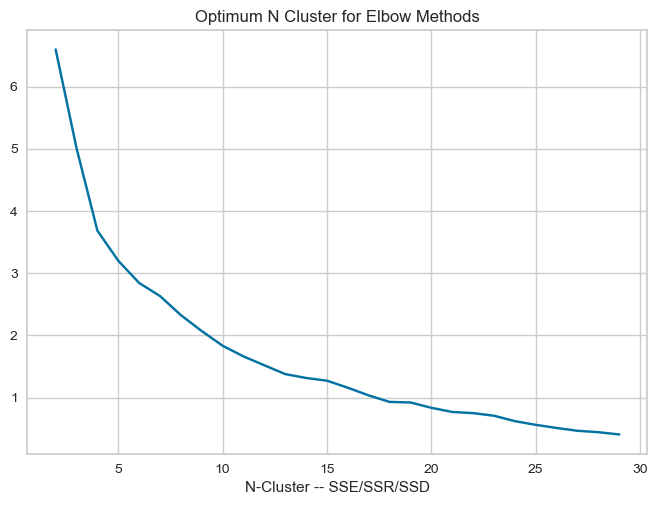

In [117]:
plt.plot(clusters, sse, "bx-")
plt.xlabel("N-Cluster -- SSE/SSR/SSD")
plt.title("Optimum N Cluster for Elbow Methods")
plt.show()

**Optimum Clustering Alternatif 2 (Elbow)**

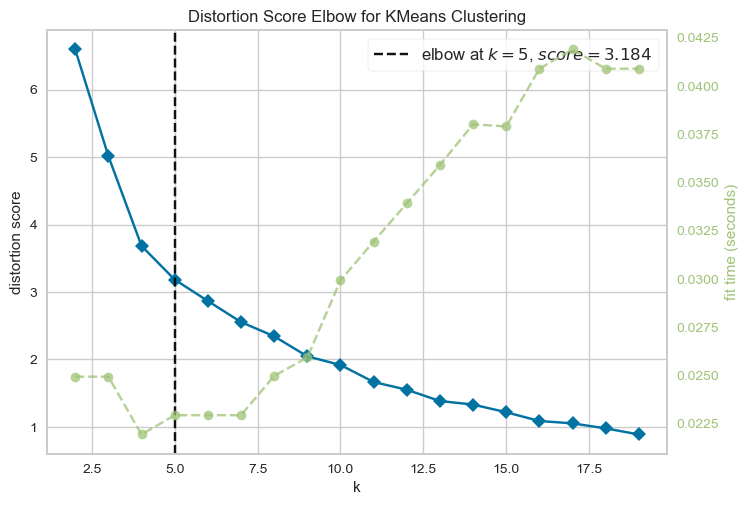

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [85]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(df)
elbow.show()

In [89]:
elbow.elbow_value_

5

**Final Model**

In [90]:
k_means = KMeans(n_clusters=elbow.elbow_value_, random_state=17).fit(X=df)

In [93]:
k_means.n_clusters

5

In [91]:
k_means.cluster_centers_

array([[0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.36187608, 0.34564579, 0.5653753 , 0.33444075],
       [0.83562823, 0.70645793, 0.37772397, 0.37172388],
       [0.13143483, 0.09806974, 0.32511556, 0.10617806],
       [0.22289157, 0.27853881, 0.87288136, 0.23169681]])

In [92]:
k_means.labels_

array([2, 0, 0, 1, 0, 0, 4, 1, 0, 2, 4, 3, 0, 1, 3, 1, 1, 2, 3, 0, 4, 0,
       3, 2, 1, 3, 1, 0, 3, 4, 0, 0, 2, 3, 1, 1, 1, 1, 4, 2, 3, 2, 0, 4,
       3, 1, 1, 3, 3, 1])

In [101]:
df = pd.read_csv('USArrests.csv', index_col=0)

In [102]:
df['cluster'] = k_means.labels_
df['cluster'] = df['cluster'] + 1

In [103]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


In [106]:
df.groupby('cluster').agg(['count', 'mean', 'median'])

Murder                   Assault                    UrbanPop  \
         count       mean median   count        mean median    count   
cluster                                                                
1           12  10.966667   11.2      12  264.000000  259.0       12   
2           14   6.807143    6.7      14  145.928571  148.0       14   
3            7  14.671429   14.4       7  251.285714  249.0        7   
4           11   2.981818    2.6      11   73.636364   72.0       11   
5            6   4.500000    3.9       6  126.333333  134.5        6   

                           Rape                    
              mean median count       mean median  
cluster                                            
1        76.500000   80.0    12  33.608333  32.00  
2        65.357143   66.5    14  20.242857  19.75  
3        54.285714   58.0     7  21.685714  22.20  
4        51.181818   53.0    11  11.409091  11.20  
5        83.500000   84.0     6  16.266667  17.55

## 2) Hierarchical Cluster

In [107]:
df = pd.read_csv('USArrests.csv', index_col=0)

In [109]:
sc = MinMaxScaler((0, 1))

In [110]:
df = sc.fit_transform(df)

In [112]:
hc_average = linkage(df, 'average')

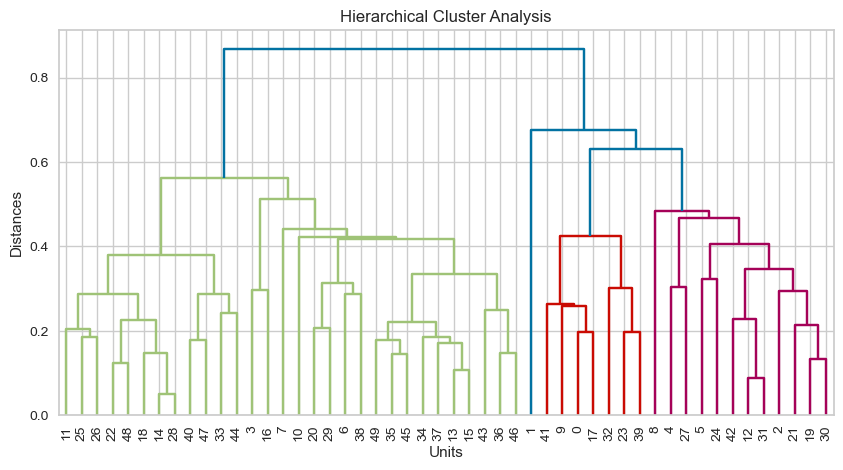

In [118]:
plt.figure(figsize=(10, 5))
plt.title("Hierarchical Cluster Analysis")
plt.xlabel("Units")
plt.ylabel("Distances")
dendrogram(hc_average,
           leaf_font_size=10)
plt.show()

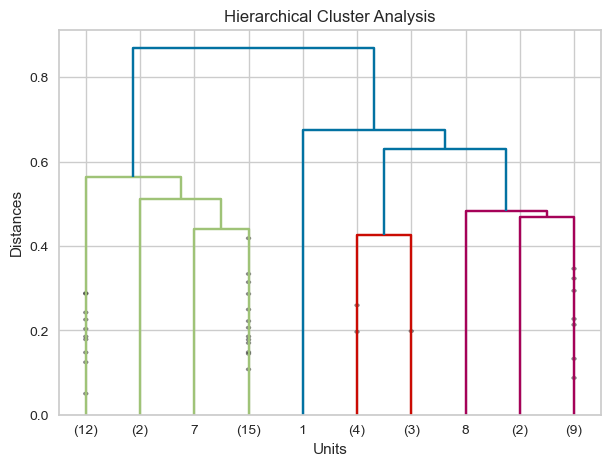

In [119]:
plt.figure(figsize=(7, 5))
plt.title("Hierarchical Cluster Analysis")
plt.xlabel("Units")
plt.ylabel("Distances")
dendrogram(hc_average,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.show()

**Determining the Number of Clusters**

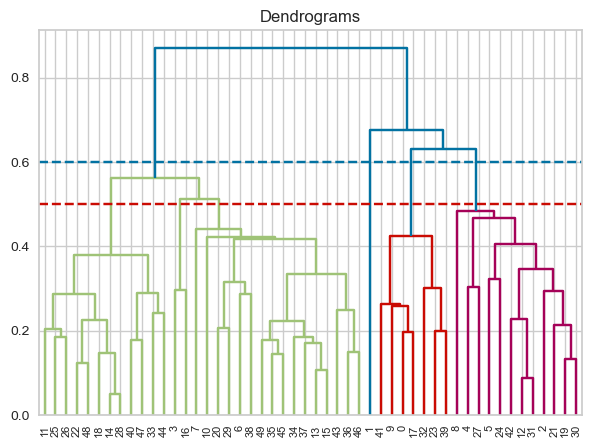

In [120]:
plt.figure(figsize=(7, 5))
plt.title("Dendrograms")
dend = dendrogram(hc_average)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axhline(y=0.6, color='b', linestyle='--')
plt.show()

**Final Model**

In [121]:
from sklearn.cluster import AgglomerativeClustering

In [122]:
cluster = AgglomerativeClustering(n_clusters=5, linkage="average")

In [123]:
clusters = cluster.fit_predict(df)

In [125]:
df = pd.read_csv('USArrests.csv', index_col=0)

In [126]:
df['hc_cluster_no'] = cluster.fit_predict(df)
df['hc_cluster_no'] = df['hc_cluster_no'] + 1

In [127]:
df.head()

,Murder,Assault,UrbanPop,Rape,hc_cluster_no
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,2


In [128]:
df.groupby('hc_cluster_no').agg(['count', 'mean', 'median'])

Murder                   Assault                    UrbanPop  \
               count       mean median   count        mean median    count   
hc_cluster_no                                                                
1                 14   8.214286   7.65      14  173.285714  167.5       14   
2                 14  11.471429  11.35      14  263.500000  257.0       14   
3                 10   2.950000   2.40      10   62.700000   56.5       10   
4                  2  14.200000  14.20       2  336.000000  336.0        2   
5                 10   5.590000   6.00      10  112.400000  111.5       10   

                                 Rape                    
                    mean median count       mean median  
hc_cluster_no                                            
1              70.642857   69.0    14  22.842857  23.10  
2              69.142857   71.0    14  29.000000  26.95  
3              53.900000   53.5    10  11.510000  11.00  
4              62.500000   62.5     2  24.000000  24.00  
5              65.600000   65.5    10  17.270000  16.45

**Compare hierarchical cluster analysis and k-means**

In [129]:
df['kmeans_cluster_no'] = k_means.labels_
df['kmeans_cluster_no'] = df['kmeans_cluster_no'] + 1

In [130]:
df.head()

,Murder,Assault,UrbanPop,Rape,hc_cluster_no,kmeans_cluster_no
Alabama,13.2,236,58,21.2,2,3
Alaska,10.0,263,48,44.5,2,1
Arizona,8.1,294,80,31.0,2,1
Arkansas,8.8,190,50,19.5,1,2
California,9.0,276,91,40.6,2,1


## 3) Principal Component Analysis

In [132]:
df = pd.read_csv('hitters.csv')

In [138]:
num_cols = [col for col in df.columns if df[col].dtype != 'O' and 'Salary' not in col]

In [139]:
df = df[num_cols]

In [140]:
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12


In [144]:
df = StandardScaler().fit_transform(df)

In [147]:
pca = PCA()

In [148]:
pca_fit = pca.fit_transform(df)

In [151]:
pca.explained_variance_ratio_

array([4.60378552e-01, 2.60398491e-01, 1.03388605e-01, 5.36902121e-02,
       4.20784091e-02, 2.96359092e-02, 1.57079101e-02, 1.13928108e-02,
       7.83230398e-03, 5.87669497e-03, 3.74765194e-03, 3.09384056e-03,
       1.55679403e-03, 8.59034766e-04, 2.86873704e-04, 7.59064046e-05])

In [153]:
np.cumsum(pca.explained_variance_ratio_)

array([0.46037855, 0.72077704, 0.82416565, 0.87785586, 0.91993427,
       0.94957018, 0.96527809, 0.9766709 , 0.9845032 , 0.9903799 ,
       0.99412755, 0.99722139, 0.99877819, 0.99963722, 0.99992409,
       1.        ])

**Optimum Component**

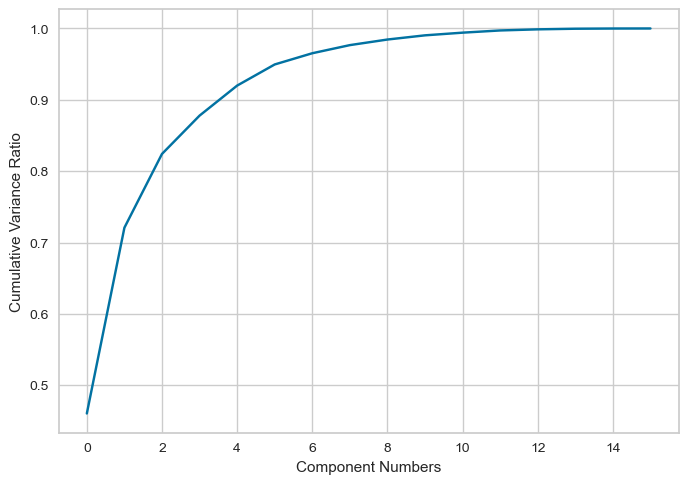

In [155]:
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Component Numbers")
plt.ylabel("Cumulative Variance Ratio")
plt.show()

**Final PCA**

In [156]:
pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df)

pca.explained_variance_ratio_
np.cumsum(pca.explained_variance_ratio_)

array([0.46037855, 0.72077704, 0.82416565])

## 4) BONUS: Principal Component Regression (PCR)

In [158]:
df = pd.read_csv("Hitters.csv")

In [159]:
num_cols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]

In [160]:
others = [col for col in df.columns if col not in num_cols]

**Concat dataframes**

In [162]:
final_df = pd.concat([pd.DataFrame(pca_fit, columns=["PC1","PC2","PC3"]),
                      df[others]], axis=1)

In [163]:
final_df

,PC1,PC2,PC3,League,Division,Salary,NewLeague
0,-3.240106,-0.253173,0.776066,A,E,NaN,A
1,0.245488,1.302951,0.118040,N,W,475.0,N
2,0.603883,-2.617002,-0.698183,A,W,480.0,A
3,3.591276,0.547821,-1.049022,N,E,500.0,N
4,-2.264528,-0.698898,-1.290536,N,E,91.5,N
...,...,...,...,...,...,...,...
317,-0.089503,-0.521050,-0.770721,N,E,700.0,N
318,3.339811,-0.732713,3.114194,A,E,875.0,A
319,-0.951442,-0.910086,0.286517,A,W,385.0,A
320,2.091473,-2.265826,-0.192745,A,E,960.0,A


In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

**Label Encoding**

In [165]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

for col in ["NewLeague", "Division", "League"]:
    label_encoder(final_df, col)

**Drop na**

In [166]:
final_df.dropna(inplace=True)

In [167]:
final_df.shape

(263, 7)

**Model**

In [168]:
y = final_df["Salary"]
X = final_df.drop(["Salary"], axis=1)

In [170]:
lm = LinearRegression()
rmse = np.mean(np.sqrt(-cross_val_score(lm, X, y, cv=5, scoring="neg_mean_squared_error")))
rmse

345.6021106351967

In [171]:
y.mean()

535.9258821292775

In [172]:
cart = DecisionTreeRegressor()
rmse = np.mean(np.sqrt(-cross_val_score(cart, X, y, cv=5, scoring="neg_mean_squared_error")))

In [173]:
cart_params = {'max_depth': range(1, 11),
               "min_samples_split": range(2, 20)}

In [174]:
cart_best_grid = GridSearchCV(cart,
                              cart_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=True).fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [175]:
cart_final = DecisionTreeRegressor(**cart_best_grid.best_params_, random_state=17).fit(X, y)

In [176]:
rmse = np.mean(np.sqrt(-cross_val_score(cart_final, X, y, cv=5, scoring="neg_mean_squared_error")))

In [177]:
rmse

330.1964109339104

## 5) BONUS: Visualizing Multidimensional Data in 2D with PCA

**Breast cancer dataset**

In [178]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [180]:
df = pd.read_csv("breast_cancer.csv")

In [181]:
y = df["diagnosis"]
X = df.drop(["diagnosis", "id"], axis=1)

In [182]:
def create_pca_df(X, y):
    X = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    pca_fit = pca.fit_transform(X)
    pca_df = pd.DataFrame(data=pca_fit, columns=['PC1', 'PC2'])
    final_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)
    return final_df

In [184]:
pca_df = create_pca_df(X, y)
pca_df

,PC1,PC2,diagnosis
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M
...,...,...,...
564,6.439315,-3.576817,M
565,3.793382,-3.584048,M
566,1.256179,-1.902297,M
567,10.374794,1.672010,M


In [185]:
def plot_pca(dataframe, target):
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('PC1', fontsize=15)
    ax.set_ylabel('PC2', fontsize=15)
    ax.set_title(f'{target.capitalize()} ', fontsize=20)

    targets = list(dataframe[target].unique())
    colors = random.sample(['r', 'b', "g", "y"], len(targets))

    for t, color in zip(targets, colors):
        indices = dataframe[target] == t
        ax.scatter(dataframe.loc[indices, 'PC1'], dataframe.loc[indices, 'PC2'], c=color, s=50)
    ax.legend(targets)
    ax.grid()
    plt.show()

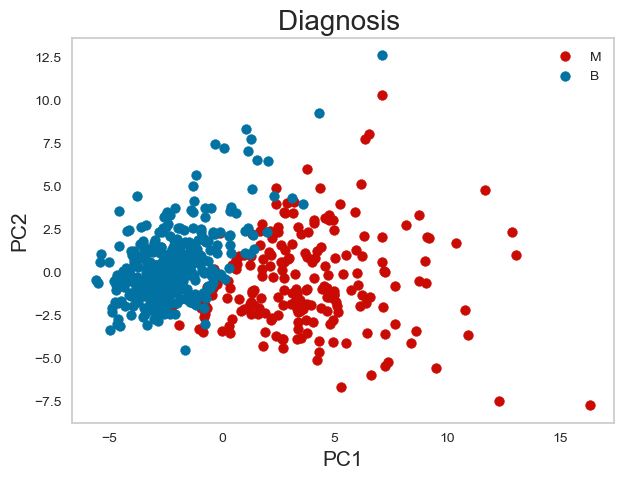

In [186]:
plot_pca(pca_df, "diagnosis")

**Iris Data**

In [187]:
import seaborn as sns
df = sns.load_dataset("iris")

In [188]:
y = df["species"]
X = df.drop(["species"], axis=1)

In [189]:
pca_df = create_pca_df(X, y)

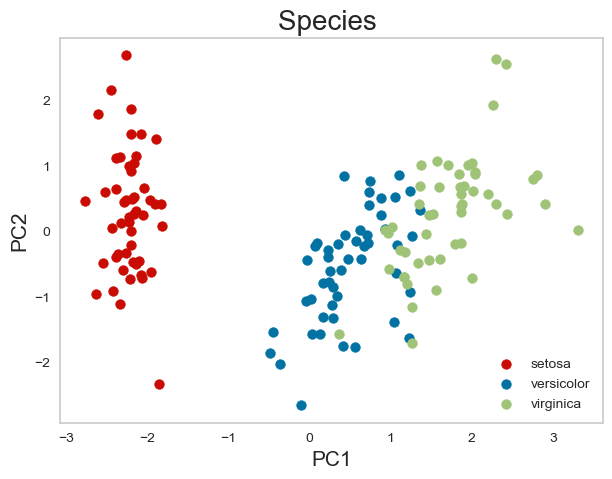

In [190]:
plot_pca(pca_df, "species")

**Diabets Data**

In [192]:
df = pd.read_csv("diabetes.csv")

In [193]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [194]:
pca_df = create_pca_df(X, y)

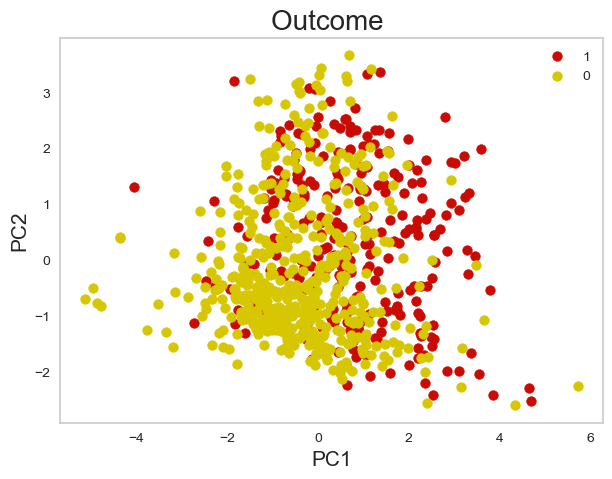

In [195]:
plot_pca(pca_df, "Outcome")